# 1. Planning your experiment

## Statistical power and sample size calculation for RNA-seq experiment

**Scenario:** running a small pilot RNA-seq experiment where we want to compare mutant cell line (treatment group) to a wild-type cell Line (control group)

**Goal:** to use the RNASeqPower Bioconductor package to **determine the minimum number of biological replicates (n) per group** required to detect a biologically meaningful fold-change for an average-performing gene, given typical sequencing parameters.

Here are the **key parameters** that have been estimated from pilot data and published literature:

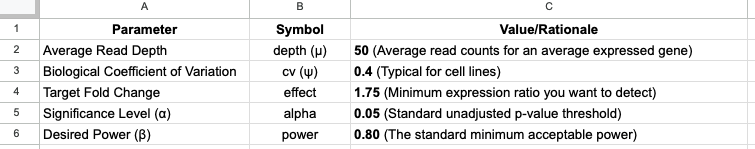

1. Install and load the "RNASeqPower" Bioconductor package

In [ ]:
# Install Bioconductor (only needs to be done once)
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

# Install the RNASeqPower package (only needs to be done once)
BiocManager::install("RNASeqPower")

In [ ]:
# Load the installed package
library(RNASeqPower)

2. Calculate the Required Sample Size

A formal sample size calculation for comparison of two groups will involve five factors, each of which is an argument to the rnapower function:
*   The depth of sequencing and consequent expected count µ for a given transcript, argument **depth**.
*   The coefficient of variation of counts within each of the two groups, argument **cv**.
*   The relative expression that we wish to detect ∆, argument **effect**.
*   The target false positive rate α and false negative rate β desired (or power = 1 − β), arguments **alpha** and **power**.
*   The number of samples n in each group, argument **n**

In [ ]:
# Calculate sample size (n) per group
ss_result <- rnapower(
  depth = 50,
  cv = 0.4,
  effect = 1.75,
  alpha = 0.05,
  power=c(0.80, 0.85, 0.90, 0.95)
)

In [ ]:
# print the results
ss_result

In [ ]:
# round up the results, as you can't have a fraction of a sample
ceiling(ss_result)

In [ ]:
# Print full results showing a single numeric value representing n per group)
cat("Required sample size (n) per group, with 80% statistical power:", ceiling(ss_result)[1], "\n")
cat("Required sample size (n) per group, with 85% statistical power:", ceiling(ss_result)[2], "\n")
cat("Required sample size (n) per group, with 90% statistical power:", ceiling(ss_result)[3], "\n")
cat("Required sample size (n) per group, with 95% statistical power:", ceiling(ss_result)[4], "\n")

Required sample size (n) per group, with 80% statistical power: 10 
Required sample size (n) per group, with 85% statistical power: 11 
Required sample size (n) per group, with 90% statistical power: 13 
Required sample size (n) per group, with 95% statistical power: 15 


# 2. Collecting the data

## Basics commands in tidyverse

In [ ]:
# Install the tidyverse package (only needs to be done once)
install.packages("tidyverse")

In [ ]:
# Load the installed package
library(tidyverse)

In [ ]:
# Import data
passengers <- read.csv("data/train.csv")

In [ ]:
# Check out the first several observations of your dataframe
passengers

### Pipes


To make R code more human readable, the Tidyverse tools use the pipe, %>%, which was acquired from the ‘magrittr’ package and comes installed automatically with Tidyverse. The pipe allows the output of a previous command to be used as input to another command instead of using nested functions.


In [ ]:
# Check out the first several observations of your dataframe USINF A PIPE
passengers %>%
  summary()

HINT: you can concatenate pipes!

In [ ]:
# Check out the first several observations of your dataframe after dropping observations that have missing values
passengers %>%
  drop_na() %>%
  summary()

### Wrangle your Data - using filter(), arrange() and mutate()


In [ ]:
# choose a particular set of observations, say, those for which the "Sex" was 'female'
passengers %>%
  filter(Sex == "female")

In [ ]:
# sort your observations by increasing 'Fare' to see if you can notice any trends
passengers %>%
  arrange(Fare)

# NOTE: by default, arrange() sorts in increasing order

# Arrange by decreasing Fare
passengers %>%
  arrange(desc(Fare))

In [ ]:
# feature engineering: create a new variable by adding two existing variables from the dataset
# 1 - 'Parch' is the number of parents and children
# 2 - 'SibSp' is the number of siblings and spouses

# You can add these together to get a new variable 'FamSize' (will be added as an extra columna at the end of the dataset)

passengers %>%
  mutate(FamSize = Parch + SibSp)

### Summarizing and Grouping your Data

In [ ]:
# Use summarise() to find out the mean fare paid
passengers %>%
  summarise(meanFare = mean(Fare))

In [ ]:
# Use summarise() to find out the median fare paid
passengers %>%
  summarise(medianFare = median(Fare))

In [ ]:
# Use the filter() and summarise() together to find out the mean fare paid among men:
passengers %>%
  filter(Sex == "male") %>%
  summarise(meanFare = mean(Fare))

In [ ]:
# Use filter() and summarise() to find out the mean fare paid among women and how many women survived:
passengers %>%
  filter(Sex == "female") %>%
  summarise(meanFare = mean(Fare), numSurv = sum(Survived))

In [ ]:
# Use group_by() and summarise() to find the mean fare and number of survivors as a function of sex:
passengers %>%
  group_by(Sex) %>%
  summarise(meanFare = mean(Fare), numSurv = sum(Survived))